# Задача распознавания пола человека по голосу

Источник данных: https://www.kaggle.com/datasets/primaryobjects/voicegender

Цели работы: 

1. Научиться строить решающее дерево и пользоваться его параметрами для улучшения качества модели.

2. Построить модель решающего дерева для определения принадлежности голоса мужчине или женщине по частотным характеристикам голоса.


Информация о столбцах: 

- meanfreq — средняя частота голоса спикера (в кГц);
- sd — стандартное отклонение частоты (в кГц);
- median — медианная частота (в кГц);
- Q25 — первый квартиль частоты (25-я квантиль) (в кГц);
- Q75 — третий квартиль частоты (75-я квантиль) (в кГц);
- IQR — межквартильный размах (Q75-Q25) (в кГц);
- skew — асимметрия распределения частот;
- kurt — эксцесс распределения частот;
- sp.ent — спектральная энтропия;
- sfm — спектральная равномерность;
- ode — модальная частота (наиболее популярная частота голоса);
- centroid — частотный центроид;
- peakf — пиковая частота (частота с наибольшей энергией);
- meanfun — среднее значение основной частоты, измеренной по акустическому сигналу;
- minfun — минимальное значение основной частоты, измеренной по акустическому сигналу;
- maxfun — максимальное значение основной частоты, измеренной по акустическому сигналу;
- meandom — среднее значение доминирующей частоты, измеренной по акустическому сигналу;
- mindom — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;
- maxdom — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;
- dfrange — диапазон доминирующей частоты, измеренный по акустическому сигналу;
- modindx — индекс модуляции;
- label — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).

In [1]:
#Импорт нужных библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [2]:
#Посмотрим на данные

voice_data = pd.read_csv('voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
#Общие сведения о данных
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
#Сколько пропусков есть в данных
voice_data.isnull().sum().sum()

0

In [5]:
# Разбиваем данные на признаки и таргет
X = voice_data.drop('label', axis=1)
y = voice_data['label']

In [6]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


### Задание 1

Создать модель дерева решений максимальной глубины 1. В качестве критерия информативности использовать энтропию Шеннона.

Обучить модель на тренировочной выборке и визуализировать её в виде графа.

Вопросы:

1. На основе какого фактора будет построено решающее правило в корневой вершине?
2. Чему равно оптимальное пороговое значение для данного фактора? 
3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? 
4. Сделать предсказание и рассчитать значение метрики accuracy на тестовой выборке. 

### Решение

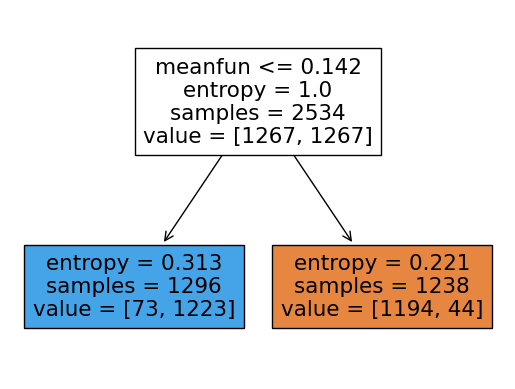

In [7]:
tr = tree.DecisionTreeClassifier(
    max_depth=1,
    criterion='entropy'
)

tr.fit(X_train,y_train)

tree.plot_tree(
    decision_tree=tr,
    feature_names=X.columns,
    filled=True,
    impurity=True
);


Ответ 1: На основе какого фактора будет построено решающее правило в корневой вершине?

meanfun
    
Ответ 2: Чему равно оптимальное пороговое значение для данного фактора?

0.142

Ответ 3:Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке?

51.1% (1296/2534)

In [8]:
#Ответ 4: Сделать предсказание и рассчитать значение метрики accuracy на тестовой выборке.

y_pred = tr.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9558359621451105


### Задание 2

Увеличить глубину дерева.

Создать дерево решений с максимальной глубиной 2. В качестве критерия информативности использовать энтропию Шеннона.

Обучить модель на тренировочной выборке и визуализируйте её в виде графа.

1. Выяснить, какие факторы используются при построении данного дерева решений.

2. Сколько листьев в построенном дереве содержат в качестве предсказания класс female?

3. Сделать предсказание и рассчитать значение метрики accuracy на тестовой выборке. 

### Решение

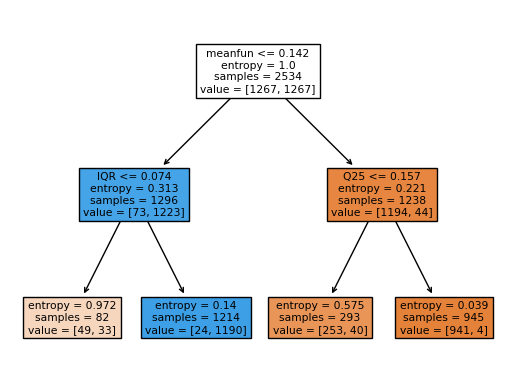

In [9]:
tr = tree.DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy'
)

tr.fit(X_train,y_train)

tree.plot_tree(
    decision_tree=tr,
    feature_names=X.columns,
    filled=True,
    impurity=True
);

Ответ 1: Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений.

meanfun, IQR, Q25

Ответ 2: Сколько листьев в построенном дереве содержат в качестве предсказания класс female?

1 (смотрим по количеству в параметре value (второй элемент списка)



In [10]:
#Ответ 3: Сделать предсказание и рассчитать значение метрики accuracy на тестовой выборке.

y_pred = tr.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9621451104100947


### Задание 3

Создать дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности использовать энтропию Шеннона.

В качестве значения параметра random_state взять 0.

Обучить модель на тренировочной выборке.

1. Чему равна глубина полученного дерева решения? 
2. Чему равно количество листьев в полученном дереве решений? 
3. Сделать предсказание для обучающей и тестовой выборок и рассчитать значение метрики accuracy на каждой из выборок. 

### Решение

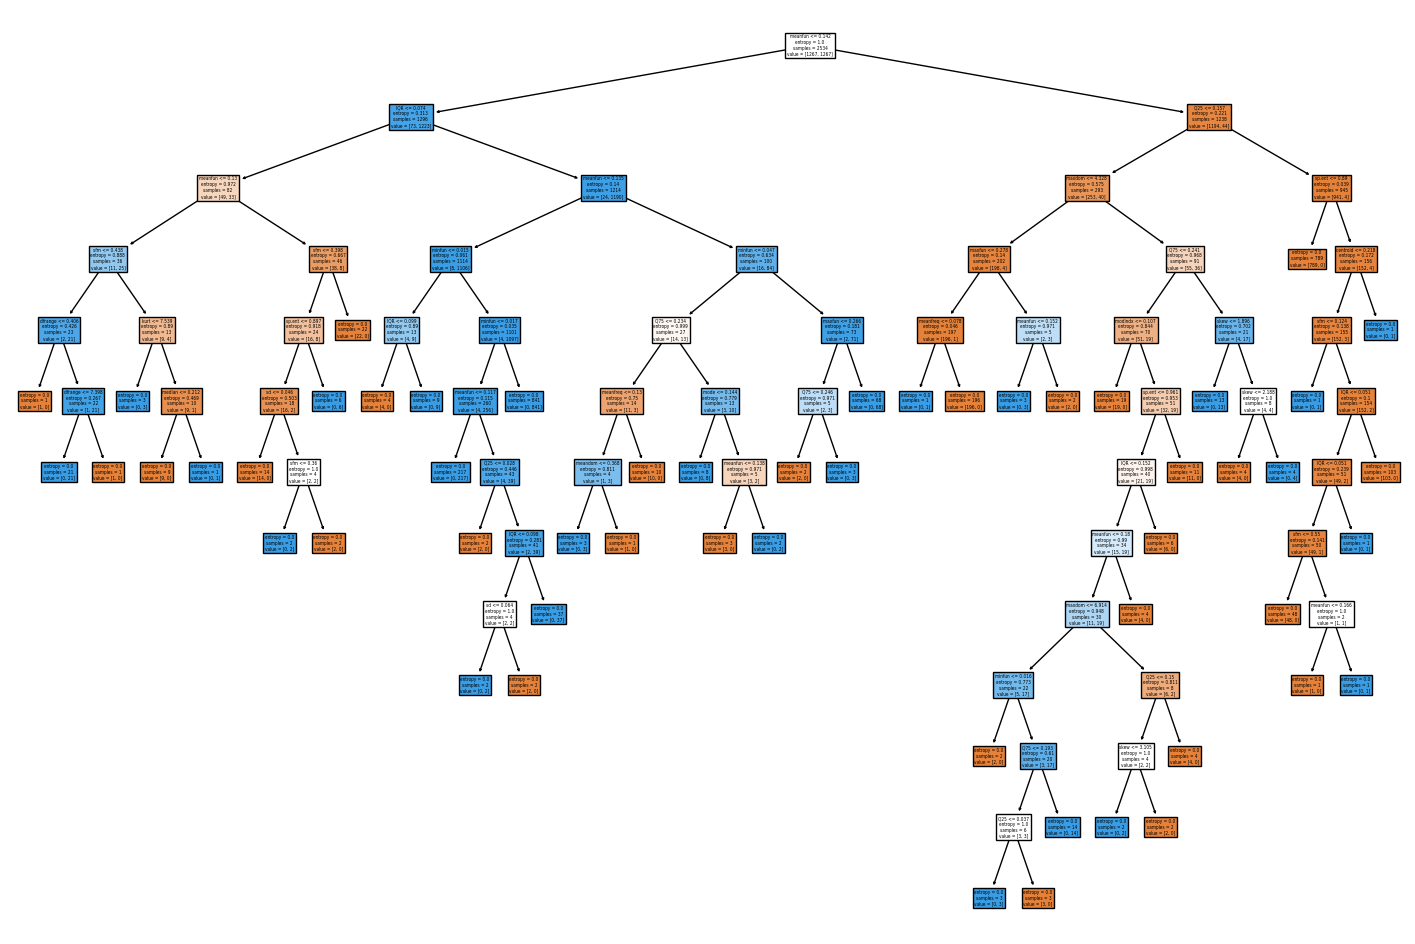

In [11]:
tr = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=0
)

tr.fit(X_train, y_train)

fig = plt.figure(figsize=(18,12))
tree.plot_tree(
    decision_tree=tr,
    feature_names=X.columns,
    filled=True,
    impurity=True
);

In [12]:
# Чему равна глубина полученного дерева решения? 
tr.get_depth()

12

In [13]:
# Чему равно количество листьев в полученном дереве решений?
tr.get_n_leaves()

54

In [14]:
# Сделать прогноз для обучающей и тестовой выборок. Посчитать метрику accuracy для каждого прогноза.

y_train_pred = tr.predict(X_train)
y_test_pred = tr.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.973186119873817


### Задание 4

Попробовать найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Для этого воспоьзоваться классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (GridSearchCV).

С помощью GridSearchCV из модуля model_selection библиотеки sklearn перебрать гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найти оптимальные. Параметр random_state для дерева решений установить равным 0. В качестве метрики качества (параметр scoring) использовать accuracy.

1. Какой критерий информативности использует наилучшая модель?
2. Чему равна оптимальная максимальная глубина?
3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?
4. С помощью наилучшей модели сделать предсказание для обучающей и тестовой выборок. Рассчитать значение метрики accuracy на каждой из выборок. 

### Решение

In [15]:
# Заданная сетка параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
# Заданный метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

In [16]:
estimator = tree.DecisionTreeClassifier(random_state=0)
grid = model_selection.GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}

In [17]:
# Прогноз с помощью полученных оптимальных параметров

tr = tree.DecisionTreeClassifier(
    max_depth=7,
    criterion='gini',
    min_samples_split=3,
    random_state=0)

tr.fit(X_train, y_train)

y_train_pred = tr.predict(X_train)
y_test_pred = tr.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9956590370955012
0.9700315457413249


### Задание 5

Для оптимального дерева решений, построенного в задании 4, найти важность каждого из факторов. Визуализировать её в виде столбчатой диаграммы.

Выделить топ-3 наиболее важных факторов, участвующих в построении дерева решений:

### Решение

In [18]:
# Важность факторов
print(tr.feature_importances_)

[0.00257071 0.00412021 0.00324731 0.00143184 0.00361359 0.05681024
 0.00419621 0.00654448 0.00091911 0.01800429 0.0060468  0.00598505
 0.86134736 0.01415259 0.         0.00119966 0.00153412 0.
 0.00688824 0.0013882 ]


In [19]:
# Названия факторов
print(X.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [20]:
# Для удобства соберём названия и значения важности в один датафрейм, отсортируем его по важности
fi = pd.DataFrame({'features':list(X.columns), 'feature_importance':tr.feature_importances_})
fi_sorted = fi.sort_values(by='feature_importance', ascending=True)
fi_sorted

,features,feature_importance
17,maxdom,0.000000
14,maxfun,0.000000
8,sp.ent,0.000919
15,meandom,0.001200
19,modindx,0.001388
3,Q25,0.001432
16,mindom,0.001534
0,meanfreq,0.002571
2,median,0.003247
4,Q75,0.003614


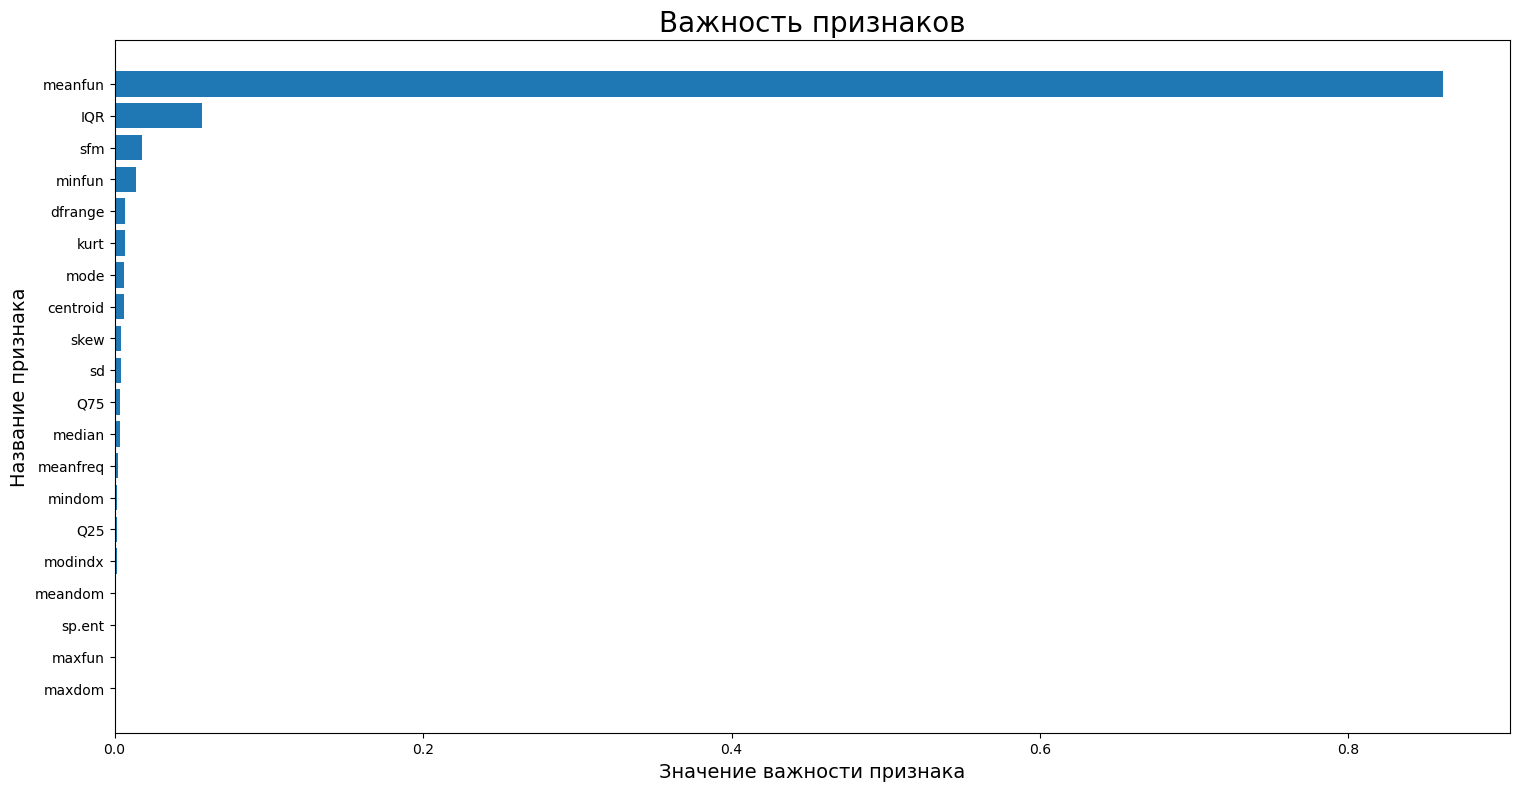

In [21]:
# Визулизируем важность признаков:
fig = plt.figure(figsize=(18,9))

plt.barh(fi_sorted['features'], fi_sorted['feature_importance']);
plt.title('Важность признаков', fontsize=20);
plt.xlabel('Значение важности признака', fontsize=14);
plt.ylabel('Название признака', fontsize=14);